<a href="https://colab.research.google.com/github/CallensToon/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Kaggle_eye_blinking_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Model 1**

**Model = SVC**

Get the datasets (train and test dataset)

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

In [0]:
print(trainset.head())
print(testset.head())

       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]


Divide trainset and testset into the features only (remove label from trainset and index from testset).

In [0]:
y_train = trainset.pop('label')
X_train = trainset
X_test = testset.iloc[:,:14]

Scale the train and testset. Fit and transform the trainset and then transform the testset.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_stand = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns.values)
X_test_stand = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.values)

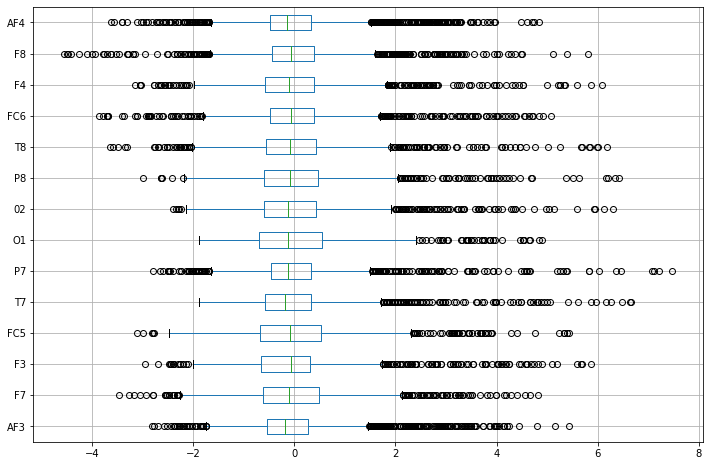

In [0]:
plt.figure(figsize=(12,8))
X_train_stand.boxplot(vert=False)
plt.show()

Define my bare C-Support Vector Classification (SVC) model.

In [0]:
from sklearn.svm import SVC

model = SVC(probability=True)

Now I fit this not optimized model on the trainset to get a broad overview of the model performance on the trainset.

In [12]:
model.fit(X_train_stand, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Calculate and print the auc score. For this I use a 10 fold cross validation to split the trainset, train on part of the trainset and predict the part of the trainset that the model was not trained on. As this is 10 fold cross validation, I get 10 values of the auc score and then take the mean of these. This gives a first indication of how well the model performs with regard to the auc score.

In [13]:
from sklearn.model_selection import cross_val_score

score_auc = cross_val_score(model, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.8942757252940738


I can further improve this model by hyperparameter tuning. The two most important parameters in this model are C and gamma. Gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’, C is a regularization parameter. We can see in the above code that standard the C=1.0 and gamma='scale'. I can improve these parameters using GridSearchCV, this calculates scores for different chosen values of the parameters by doing cross validation on the trainset. The value of this cross validation can also be changed.

In [0]:
from sklearn.model_selection import GridSearchCV

C_value = [0.01,0.1,1,10,50,100]
gamma_value = [0.1,1,10,100]             
params = dict(C=C_value, gamma=gamma_value)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.7678 (+/-0.0856) for {'C': 0.01, 'gamma': 0.1}
0.9112 (+/-0.0724) for {'C': 0.01, 'gamma': 1}
0.9329 (+/-0.0385) for {'C': 0.01, 'gamma': 10}
0.5493 (+/-0.0404) for {'C': 0.01, 'gamma': 100}
0.8035 (+/-0.0741) for {'C': 0.1, 'gamma': 0.1}
0.9112 (+/-0.0725) for {'C': 0.1, 'gamma': 1}
0.9326 (+/-0.0386) for {'C': 0.1, 'gamma': 10}
0.5651 (+/-0.0456) for {'C': 0.1, 'gamma': 100}
0.9164 (+/-0.0681) for {'C': 1, 'gamma': 0.1}
0.9590 (+/-0.0434) for {'C': 1, 'gamma': 1}
0.9325 (+/-0.0388) for {'C': 1, 'gamma': 10}
0.5825 (+/-0.0510) for {'C': 1, 'gamma': 100}
0.9561 (+/-0.0476) for {'C': 10, 'gamma': 0.1}
0.9633 (+/-0.0349) for {'C': 10, 'gamma': 1}
0.9328 (+/-0.0383) for {'C': 10, 'gamma': 10}
0.5910 (+/-0.0473) for {'C': 10, 'gamma': 100}
0.9618 (+/-0.0444) for {'C': 50, 'gamma': 0.1}
0.9633 (+/-0.0349) for {'C': 50, 'gamma': 1}
0.9328 (+/-0.0383) for {'C': 50, 'gamma': 10}
0.5910 (+/-0.0473) for {'C': 50, 'gamma': 100}
0.9605 (+/-0.0425) for {'C': 100, 'gamma': 0.1}
0.9633 (+/-0.0349) 

We can see that for values of C=10 and gamma=1 we have the highest score. So now to further optimize this, I can finetune our search around C=10 and gamma=1.

In [0]:
C_value = [8,9,10,11,12]
gamma_value = [0.5,1,1.5,2]             
params = dict(C=C_value, gamma=gamma_value)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9663 (+/-0.0377) for {'C': 8, 'gamma': 0.5}
0.9633 (+/-0.0349) for {'C': 8, 'gamma': 1}
0.9588 (+/-0.0354) for {'C': 8, 'gamma': 1.5}
0.9545 (+/-0.0355) for {'C': 8, 'gamma': 2}
0.9655 (+/-0.0370) for {'C': 9, 'gamma': 0.5}
0.9633 (+/-0.0349) for {'C': 9, 'gamma': 1}
0.9588 (+/-0.0354) for {'C': 9, 'gamma': 1.5}
0.9545 (+/-0.0355) for {'C': 9, 'gamma': 2}
0.9650 (+/-0.0373) for {'C': 10, 'gamma': 0.5}
0.9633 (+/-0.0349) for {'C': 10, 'gamma': 1}
0.9588 (+/-0.0354) for {'C': 10, 'gamma': 1.5}
0.9545 (+/-0.0355) for {'C': 10, 'gamma': 2}
0.9647 (+/-0.0376) for {'C': 11, 'gamma': 0.5}
0.9633 (+/-0.0349) for {'C': 11, 'gamma': 1}
0.9588 (+/-0.0354) for {'C': 11, 'gamma': 1.5}
0.9545 (+/-0.0355) for {'C': 11, 'gamma': 2}
0.9645 (+/-0.0374) for {'C': 12, 'gamma': 0.5}
0.9633 (+/-0.0349) for {'C': 12, 'gamma': 1}
0.9588 (+/-0.0354) for {'C': 12, 'gamma': 1.5}
0.9545 (+/-0.0355) for {'C': 12, 'gamma': 2}


Now the highest score comes from C=8 and gamma=0.5. Now I can search around these values.

In [0]:
C_value = range(2,9)
gamma_value = [i/10 for i in range(1,10)]             
params = dict(C=C_value, gamma=gamma_value)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc',cv=20)

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9358 (+/-0.0602) for {'C': 2, 'gamma': 0.1}
0.9542 (+/-0.0543) for {'C': 2, 'gamma': 0.2}
0.9602 (+/-0.0513) for {'C': 2, 'gamma': 0.3}
0.9638 (+/-0.0472) for {'C': 2, 'gamma': 0.4}
0.9649 (+/-0.0443) for {'C': 2, 'gamma': 0.5}
0.9660 (+/-0.0413) for {'C': 2, 'gamma': 0.6}
0.9661 (+/-0.0392) for {'C': 2, 'gamma': 0.7}
0.9656 (+/-0.0384) for {'C': 2, 'gamma': 0.8}
0.9653 (+/-0.0362) for {'C': 2, 'gamma': 0.9}
0.9428 (+/-0.0588) for {'C': 3, 'gamma': 0.1}
0.9574 (+/-0.0520) for {'C': 3, 'gamma': 0.2}
0.9632 (+/-0.0478) for {'C': 3, 'gamma': 0.3}
0.9662 (+/-0.0434) for {'C': 3, 'gamma': 0.4}
0.9680 (+/-0.0394) for {'C': 3, 'gamma': 0.5}
0.9681 (+/-0.0386) for {'C': 3, 'gamma': 0.6}
0.9667 (+/-0.0380) for {'C': 3, 'gamma': 0.7}
0.9654 (+/-0.0356) for {'C': 3, 'gamma': 0.8}
0.9641 (+/-0.0345) for {'C': 3, 'gamma': 0.9}
0.9462 (+/-0.0563) for {'C': 4, 'gamma': 0.1}
0.9595 (+/-0.0499) for {'C': 4, 'gamma': 0.2}
0.9654 (+/-0.0453) for {'C': 4, 'gamma': 0.3}
0.9679 (+/-0.0395) for {'C': 4, 'g

The ultimate best value achieved from our gridsearch is: C=6, gamma=0.4. Now I can score the auc again with cross validation on our trainset.

In [0]:
model_optimized = SVC(C=6, gamma=0.4, probability=True)

score_auc = cross_val_score(model_optimized, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.9689944072237651


This is a way better score than the not optimized model. And we can now do predictions with this optimized model on our testset after fitting it on our trainset.

In [0]:
model_optimized.fit(X_train_stand, y_train)

predictionsSVC = model_optimized.predict_proba(X_test_stand)

predictionsSVC

array([[9.99975927e-01, 2.40731507e-05],
       [4.52632483e-01, 5.47367517e-01],
       [9.97838221e-01, 2.16177903e-03],
       ...,
       [1.07295972e-05, 9.99989270e-01],
       [6.58565561e-02, 9.34143444e-01],
       [9.75778532e-01, 2.42214678e-02]])

Now I put the probabilities of our test values having label 1 (second column) into a suitable dataframe with 2 columns.

In [0]:
resultsSVC = pd.DataFrame()
resultsSVC['index'] = testset['index']
resultsSVC['label'] = predictionsSVC[:,1]
resultsSVC

,index,label
0,0,0.000024
1,1,0.547368
2,2,0.002162
3,3,0.999999
4,4,0.999996
...,...,...
12887,12887,0.088453
12888,12888,0.997436
12889,12889,0.999989
12890,12890,0.934143


For the final part, the predictions can be exported as a csv file.

In [0]:
filename = "my_prediction_SVC.csv"

#make sure to not write the Pandas index column (index=False)
resultsSVC.to_csv(filename,index=False)

# **Model 2**

Stacking of different models.

Get the datasets (train and test dataset)

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

In [3]:
print(trainset.head())
print(testset.head())

       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]


Divide trainset and testset into the features only (remove label from trainset and index from testset).

In [0]:
y_train = trainset.pop('label')
X_train = trainset
X_test = testset.iloc[:,:14]

Scale the train and testset. Fit and transform the trainset and then transform the testset.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_stand = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns.values)
X_test_stand = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns.values)

In short, stacking using StackingClassifier is done by training multiple different models on the trainset. The trainset is divided into k folds and each model is trained on k-1 folds and predicts the other fold. Each model makes prediction on another fold, so that in the end each fold is predicted. Next, a meta model learns from these predictions and makes a final prediction.

**First model used: SVC**

For this model, I refer to the above model used, where I optimized the model already on the trainset.

In [0]:
from sklearn.svm import SVC

modelSVC_optimized = SVC(C=5, gamma=0.4, probability=True)

**Second model used: XGBClassifier**

Again, I define my bare xgboostclassifier model. This is a gradient boosting model, so it boosts weak learners into strong learners. One parameter is set now: “binary:logistic”, as this is logistic regression for binary classification and outputs probability.

In [0]:
import xgboost as xgb

xgbc = xgb.XGBClassifier(objective ='binary:logistic')

Now I fit this not optimized model on the trainset to get a broad overview of the model performance on the trainset.

In [17]:
xgbc.fit(X_train_stand, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Calculate and print the auc score. For this I use a 10 fold cross validation to split the trainset, train on part of the trainset and predict the part of the trainset that the model was not trained on. As this is 10 fold cross validation, I get 10 values of the auc score and then take the mean of these. This gives a first indication of how well the model performs with regard to the auc score.

In [18]:
from sklearn.model_selection import cross_val_score

score_auc = cross_val_score(xgbc, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.8778484639723171


This model uses a lot of parameters, so I can tune them. To tune them all in one go will be very time consuming so I used some standard values I found online and tuned some parameter in smaller groups. I first start with: max_depth and min_child_weight. (n_estimators is set to 500 to save time, in the final model, I will set this to 5000).

In [0]:
from sklearn.model_selection import GridSearchCV

xgbc = xgb.XGBClassifier(objective ='binary:logistic', learning_rate=0.1, n_estimators = 500, max_depth = 5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree = 0.8, nthread=4, scale_pos_weight=1, seed=27)

depth = range(3,10,2)
min_child = range(1,6,2)

params = dict(max_depth=depth, min_child_weight=min_child)
grid_search = GridSearchCV(xgbc, param_grid=params, scoring='roc_auc')

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9153 (+/-0.0341) for {'max_depth': 3, 'min_child_weight': 1}
0.9085 (+/-0.0389) for {'max_depth': 3, 'min_child_weight': 3}
0.9057 (+/-0.0328) for {'max_depth': 3, 'min_child_weight': 5}
0.9308 (+/-0.0348) for {'max_depth': 5, 'min_child_weight': 1}
0.9207 (+/-0.0350) for {'max_depth': 5, 'min_child_weight': 3}
0.9190 (+/-0.0327) for {'max_depth': 5, 'min_child_weight': 5}
0.9310 (+/-0.0319) for {'max_depth': 7, 'min_child_weight': 1}
0.9230 (+/-0.0354) for {'max_depth': 7, 'min_child_weight': 3}
0.9194 (+/-0.0263) for {'max_depth': 7, 'min_child_weight': 5}
0.9327 (+/-0.0320) for {'max_depth': 9, 'min_child_weight': 1}
0.9265 (+/-0.0289) for {'max_depth': 9, 'min_child_weight': 3}
0.9179 (+/-0.0340) for {'max_depth': 9, 'min_child_weight': 5}


Best auc score is achieved with: max_depth=9, min_child_weight=1. I can now finetune these parameters.

In [0]:
depth = [8,9,10]
min_child = [1,2]

params = dict(max_depth=depth, min_child_weight=min_child)
grid_search = GridSearchCV(xgbc, param_grid=params, scoring='roc_auc')

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9290 (+/-0.0349) for {'max_depth': 8, 'min_child_weight': 1}
0.9270 (+/-0.0277) for {'max_depth': 8, 'min_child_weight': 2}
0.9294 (+/-0.0288) for {'max_depth': 9, 'min_child_weight': 1}
0.9270 (+/-0.0310) for {'max_depth': 9, 'min_child_weight': 2}
0.9295 (+/-0.0272) for {'max_depth': 10, 'min_child_weight': 1}
0.9281 (+/-0.0301) for {'max_depth': 10, 'min_child_weight': 2}


Best values for max_depth=10, for min_child_weight=1. I will now tune gamma.

In [0]:
xgbc = xgb.XGBClassifier(objective ='binary:logistic', learning_rate=0.1, n_estimators = 500, max_depth = 10, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree = 0.8, nthread=4, scale_pos_weight=1, seed=27)

gam=[0.0,0.1,0.2,0.3,0.4,0.5]

params = dict(gamma=gam)
grid_search = GridSearchCV(xgbc, param_grid=params, scoring='roc_auc')

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9327 (+/-0.0377) for {'gamma': 0.0}
0.9295 (+/-0.0342) for {'gamma': 0.1}
0.9306 (+/-0.0355) for {'gamma': 0.2}
0.9293 (+/-0.0334) for {'gamma': 0.3}
0.9302 (+/-0.0363) for {'gamma': 0.4}
0.9291 (+/-0.0352) for {'gamma': 0.5}


Best auc for gamma=0. Now I will tune subsample and colsample_bytree.

In [0]:
subs=[i/10 for i in range(6,11)]
bytree=[i/10 for i in range(6,11)]

params = dict(subsample=subs, colsample_bytree=bytree)
grid_search = GridSearchCV(xgbc, param_grid=params, scoring='roc_auc')

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9275 (+/-0.0318) for {'colsample_bytree': 0.6, 'subsample': 0.6}
0.9282 (+/-0.0281) for {'colsample_bytree': 0.6, 'subsample': 0.7}
0.9314 (+/-0.0274) for {'colsample_bytree': 0.6, 'subsample': 0.8}
0.9312 (+/-0.0293) for {'colsample_bytree': 0.6, 'subsample': 0.9}
0.9290 (+/-0.0328) for {'colsample_bytree': 0.6, 'subsample': 1.0}
0.9272 (+/-0.0308) for {'colsample_bytree': 0.7, 'subsample': 0.6}
0.9305 (+/-0.0321) for {'colsample_bytree': 0.7, 'subsample': 0.7}
0.9297 (+/-0.0334) for {'colsample_bytree': 0.7, 'subsample': 0.8}
0.9298 (+/-0.0368) for {'colsample_bytree': 0.7, 'subsample': 0.9}
0.9303 (+/-0.0335) for {'colsample_bytree': 0.7, 'subsample': 1.0}
0.9304 (+/-0.0339) for {'colsample_bytree': 0.8, 'subsample': 0.6}
0.9312 (+/-0.0310) for {'colsample_bytree': 0.8, 'subsample': 0.7}
0.9327 (+/-0.0377) for {'colsample_bytree': 0.8, 'subsample': 0.8}
0.9311 (+/-0.0321) for {'colsample_bytree': 0.8, 'subsample': 0.9}
0.9294 (+/-0.0332) for {'colsample_bytree': 0.8, 'subsample': 

Best value for colsample_bytree=1.0 and for subsample=0.8. I will now fintune these even more.

In [0]:
subs=[i/100 for i in range(75,90,5)]
bytree=[i/100 for i in range(90,105,5)]

params = dict(subsample=subs, colsample_bytree=bytree)
grid_search = GridSearchCV(xgbc, param_grid=params, scoring='roc_auc')

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9341 (+/-0.0317) for {'colsample_bytree': 0.9, 'subsample': 0.75}
0.9325 (+/-0.0328) for {'colsample_bytree': 0.9, 'subsample': 0.8}
0.9337 (+/-0.0338) for {'colsample_bytree': 0.9, 'subsample': 0.85}
0.9339 (+/-0.0328) for {'colsample_bytree': 0.95, 'subsample': 0.75}
0.9323 (+/-0.0310) for {'colsample_bytree': 0.95, 'subsample': 0.8}
0.9321 (+/-0.0327) for {'colsample_bytree': 0.95, 'subsample': 0.85}
0.9331 (+/-0.0316) for {'colsample_bytree': 1.0, 'subsample': 0.75}
0.9330 (+/-0.0355) for {'colsample_bytree': 1.0, 'subsample': 0.8}
0.9330 (+/-0.0289) for {'colsample_bytree': 1.0, 'subsample': 0.85}


Best final value for colsample_bytree=0.9, subsample=0.75.
I will now make a auc score of this model on the test set and change n_estimators to 5000 and lower the learning rate to 0.01.

In [0]:
xgbc_optimized = xgb.XGBClassifier(objective ='binary:logistic', learning_rate=0.01, n_estimators = 5000, max_depth = 10, min_child_weight=1, gamma=0, subsample=0.75, colsample_bytree = 0.9, nthread=4, scale_pos_weight=1, seed=27)

score_auc = cross_val_score(xgbc_optimized, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.9410564837812544


**Third model used: Random forest classifier**

Again, I first define the bare model and fit it on the train set.

In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rfc.fit(X_train_stand, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
score_auc = cross_val_score(rfc, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.9269083062706918


Now tuning of the parameters. The n_estimators will be set to 5000 again in the final model.

In [19]:
rfc = RandomForestClassifier()

estimators = [500]
maxd = [10,20,30,50]
minss = [2,5,10]
minsl = [1,2,5]

params = dict(n_estimators=estimators, max_depth=maxd, min_samples_split=minss, min_samples_leaf=minsl)
grid_search = GridSearchCV(rfc, param_grid=params, scoring='roc_auc')

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9070 (+/-0.0407) for {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.9026 (+/-0.0392) for {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
0.8978 (+/-0.0416) for {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
0.9040 (+/-0.0393) for {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
0.9001 (+/-0.0414) for {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
0.8963 (+/-0.0410) for {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
0.8914 (+/-0.0427) for {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}
0.8899 (+/-0.0407) for {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}
0.8911 (+/-0.0408) for {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}
0.9244 (+/-0.038

Best values: max_detph=30, min_samples_leaf=1, min_samples_split=1

In [20]:
rfc_optimized = RandomForestClassifier(max_depth=30,min_samples_leaf=1, min_samples_split=2, n_estimators=5000)

score_auc = cross_val_score(rfc_optimized, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.9314516808370019


**Fourth model used: AdaboostClassifier**

First bare model.

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME.R",n_estimators=500)

In [44]:
ada.fit(X_train_stand, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [45]:
score_auc = cross_val_score(ada, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.7425173144897915


Parameter tuning (only max_depth of DecisionTreeClassifier was optimized)

In [26]:
for depth in range(5,9):
  modelada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), algorithm="SAMME.R",n_estimators=1000)
  score_auc = cross_val_score(modelada, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()
  print('For max_depth = {}, mean auc score = {}'.format(depth, score_auc))

For max_depth = 5, mean auc score = 0.9524401093300175
For max_depth = 6, mean auc score = 0.9580554002572352
For max_depth = 7, mean auc score = 0.9567128172541016
For max_depth = 8, mean auc score = 0.9567224345481226


Best auc score for max_depth=6

In [29]:
ada_optimized = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), algorithm="SAMME.R",n_estimators=5000)

score_auc = cross_val_score(ada_optimized, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.958115619344977


**Fifth model used: GradientBoostingClassifier**

First bare model.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 500)

In [31]:
gbc.fit(X_train_stand, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
score_auc = cross_val_score(gbc, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()
print(score_auc)

0.91660375709917


Parameter tuning

In [33]:
gbc = GradientBoostingClassifier()

estimators = [500]
maxd = [5,10,20]
minss = [2,5]
minsl = [1,2,5]

params = dict(n_estimators=estimators, max_depth=maxd, min_samples_split=minss, min_samples_leaf=minsl)
grid_search = GridSearchCV(gbc, param_grid=params, scoring='roc_auc')

grid_search.fit(X_train_stand, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9300 (+/-0.0340) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.9298 (+/-0.0343) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
0.9308 (+/-0.0323) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
0.9289 (+/-0.0300) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
0.9292 (+/-0.0357) for {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}
0.9310 (+/-0.0334) for {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}
0.9247 (+/-0.0309) for {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.9286 (+/-0.0322) for {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
0.9287 (+/-0.0310) for {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
0.9294 (+/-0.0266) for {'

Best auc score for: max_depth=10 , min_samples_split=5 ,min_samples_leaf=5 .

In [34]:
gbc_optimized = GradientBoostingClassifier(n_estimators = 5000, max_depth=10, min_samples_leaf=5, min_samples_split=5)

score_auc = cross_val_score(gbc_optimized, X_train_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.9384010596946377


**actual stacking**

Meta model = logistic regression

In [36]:
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

level01 = list()
level01.append(('svm', SVC(C=5, gamma=0.4, probability=True)))
level01.append(('XGB', xgb.XGBClassifier(objective ='binary:logistic', learning_rate=0.01, n_estimators = 5000, max_depth = 10, min_child_weight=1, gamma=0, subsample=0.75, colsample_bytree = 0.9, scale_pos_weight=1, seed=27)))
level01.append(('RFC', RandomForestClassifier(max_depth=30,min_samples_leaf=1, min_samples_split=2, n_estimators=5000)))
level01.append(('ADA', AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), algorithm="SAMME.R",n_estimators=5000)))
level01.append(('GBC', GradientBoostingClassifier(n_estimators = 5000, max_depth=10, min_samples_leaf=5, min_samples_split=5)))

level11 = LogisticRegression()

modelstack1 = StackingClassifier(estimators=level01, final_estimator=level11, cv=20)

modelstack1.fit(X_train_stand, y_train)

StackingClassifier(cv=20,
                   estimators=[('svm',
                                SVC(C=5, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma=0.4, kernel='rbf', max_iter=-1,
                                    probability=True, random_state=None,
                                    shrinking=True, tol=0.001, verbose=False)),
                               ('XGB',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynod...
                                                           validation_fraction=0.1,
                                                           verbose=0,
                                                           warm_start=False))],
     

Now I make predictions with this model on the test values.

In [37]:
predictions_stack1 = modelstack1.predict_proba(X_test_stand)
predictions_stack1

array([[0.97775637, 0.02224363],
       [0.6422548 , 0.3577452 ],
       [0.97478701, 0.02521299],
       ...,
       [0.02035698, 0.97964302],
       [0.03234377, 0.96765623],
       [0.97295266, 0.02704734]])

Now I put the probabilities of our test values having label 1 (second column) into a suitable dataframe with 2 columns.

In [41]:
resultsStack = pd.DataFrame()
resultsStack['index'] = testset['index']
resultsStack['label'] = predictions_stack1[:,1]
resultsStack

,index,label
0,0,0.022244
1,1,0.357745
2,2,0.025213
3,3,0.984129
4,4,0.981531
...,...,...
12887,12887,0.079106
12888,12888,0.957482
12889,12889,0.979643
12890,12890,0.967656


For the final part, the predictions can be exported as a csv file.

In [0]:
filename = "my_prediction_resultsStackFinal.csv"

#make sure to not write the Pandas index column (index=False)
resultsStack.to_csv(filename,index=False)